## Homework 1

Daniel Vitenko

In [35]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit.primitives import StatevectorSampler
import matplotlib.pyplot as plt
import numpy as np


In [36]:
%matplotlib inline

## Question 1

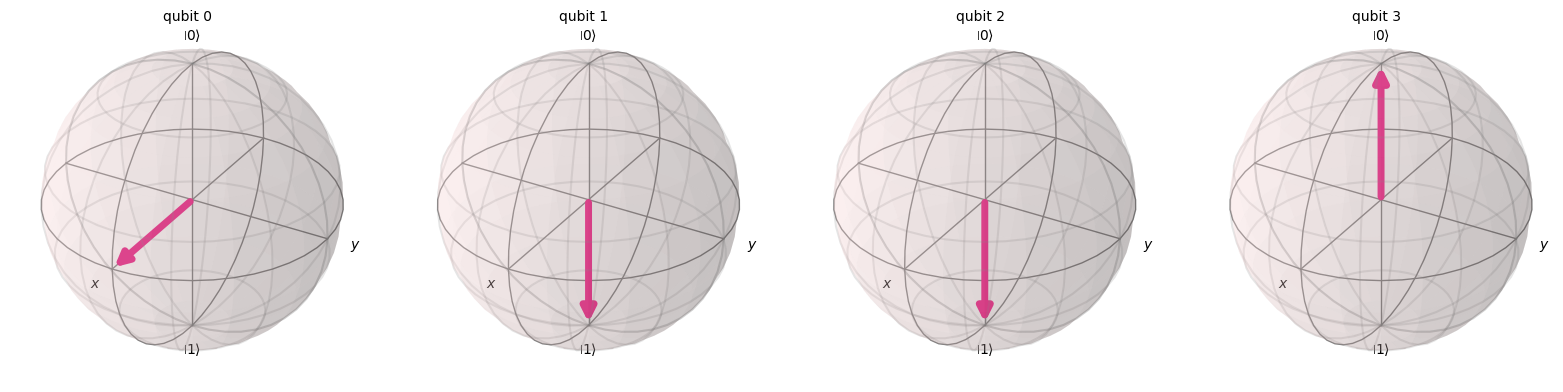

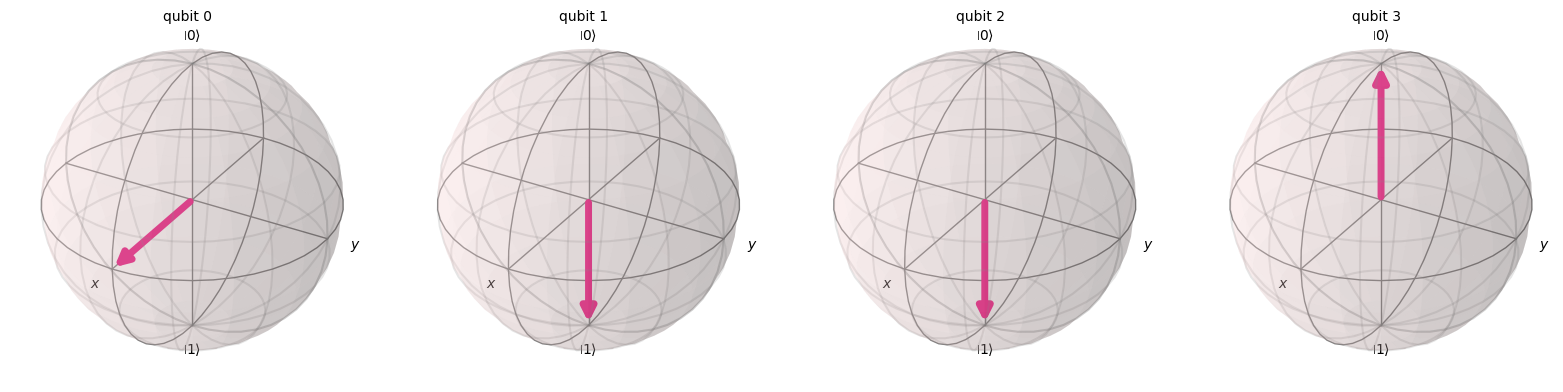

In [37]:
qc = QuantumCircuit(4)
qc.h(0)
qc.x(1)
qc.y(2)
qc.z(3)

plot_bloch_multivector(Statevector(qc))


## Question 2

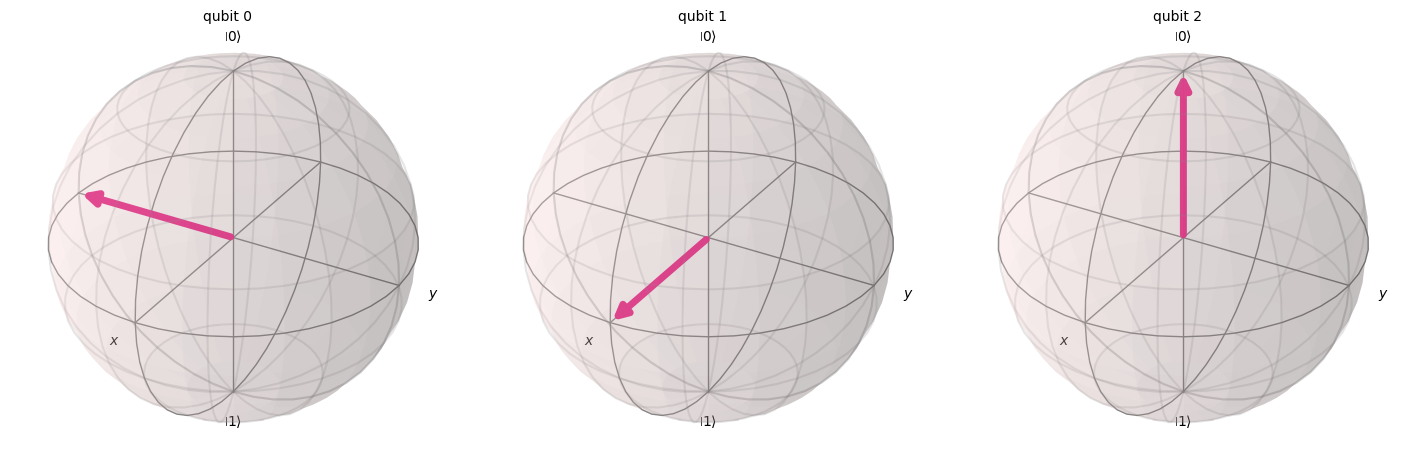

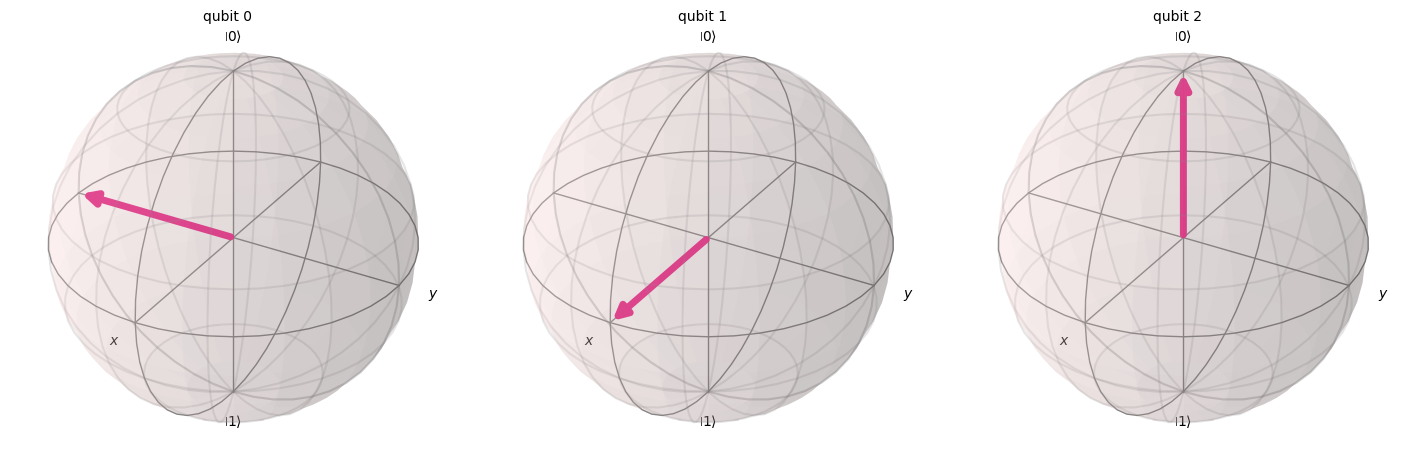

In [38]:
theta = np.pi/2

qc = QuantumCircuit(3)
qc.rx(theta, 0)
qc.ry(theta, 1)
qc.rz(theta, 2)

plot_bloch_multivector(Statevector(qc))

## Question 3a 

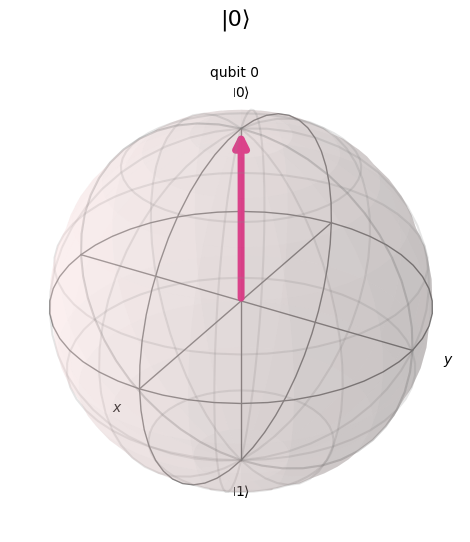

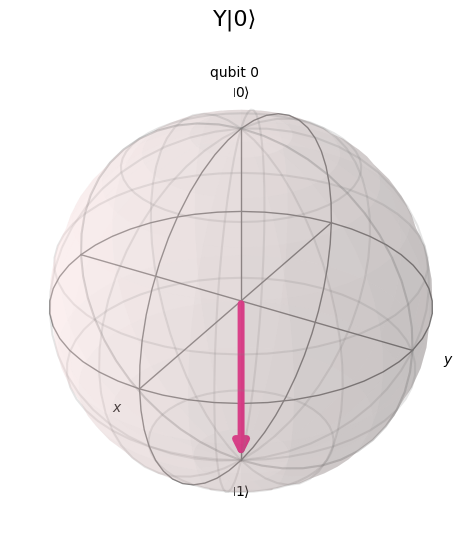

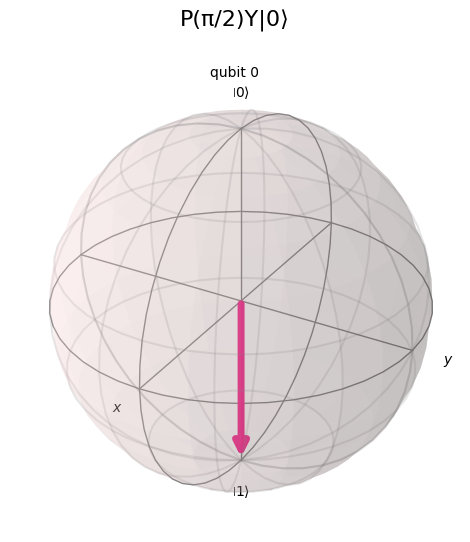

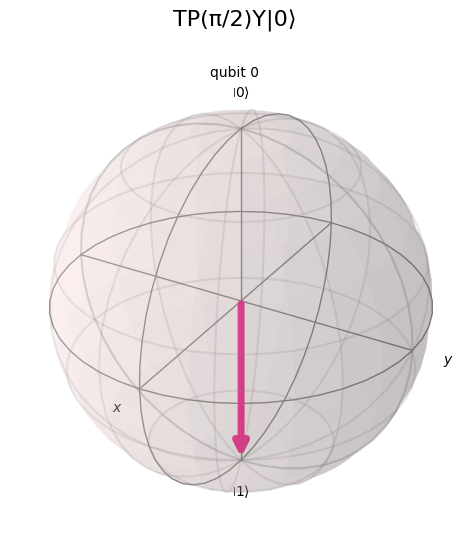

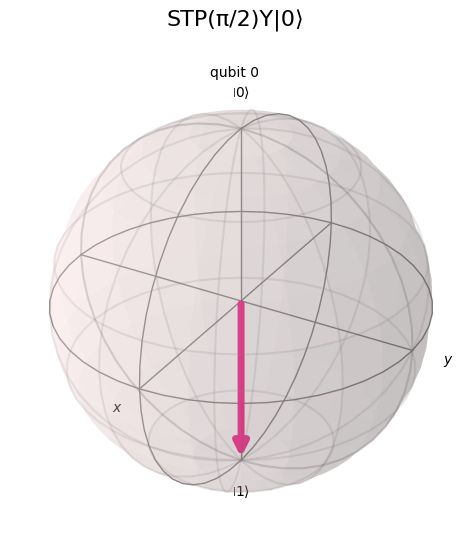

In [39]:
qc = QuantumCircuit(1)
plot_bloch_multivector(Statevector(qc), title="|0⟩")

qc.y(0)
plot_bloch_multivector(Statevector(qc), title="Y|0⟩")

theta = np.pi/2
qc.p(theta, 0)
plot_bloch_multivector(Statevector(qc), title="P(π/2)Y|0⟩")

qc.t(0)
plot_bloch_multivector(Statevector(qc), title="TP(π/2)Y|0⟩")

qc.s(0)
plot_bloch_multivector(Statevector(qc), title="STP(π/2)Y|0⟩")

plt.show()

## Question 3b

Counts(ideal): {'1': 1024}


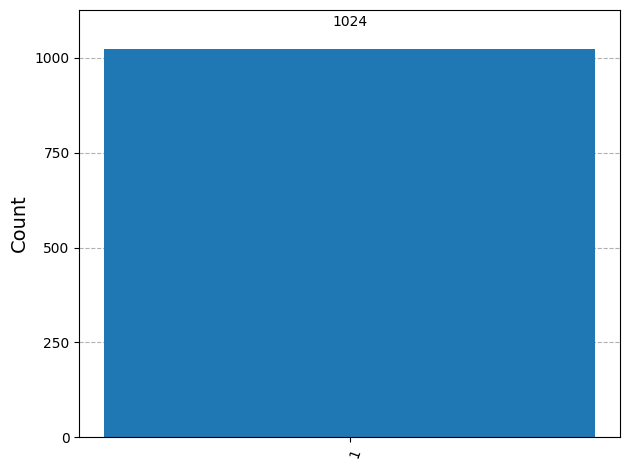

In [56]:
qc.measure_all()

sampler = StatevectorSampler()

result = sampler.run([qc], shots=1024).result()
counts = result[0].data.meas.get_counts()
print('Counts(ideal):', counts)
plot_histogram(counts);

## Run on simulator

In [ ]:

sampler = Sampler()

job = sampler.run([qc], shots=1024)

result_ideal = job.result()
counts_ideal = result_ideal[0].data.meas.get_counts()
print('Counts(ideal):', counts_ideal)
plot_histogram(counts_ideal)


AttributeError: 'DataBin' object has no attribute 'meas'

## Run on quantum computer

qiskit_runtime_service.__init__:WARNING:2026-01-27 16:54:04,367: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: open-instance. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().
qiskit_runtime_service.backends:WARNING:2026-01-27 16:54:04,727: Loading instance: open-instance, plan: open
qiskit_runtime_service.backends:WARNING:2026-01-27 16:54:06,077: Using instance: open-instance, plan: open


Counts: {'1': 68, '0': 60}


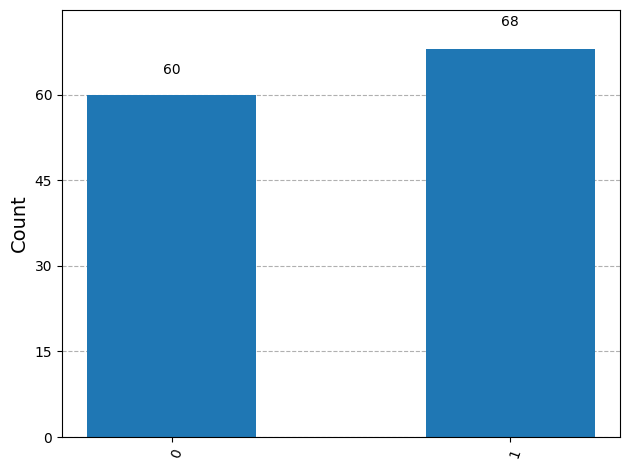

In [ ]:
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler

from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()
backend = service.least_busy(simulator=False, operational=True)
sampler = Sampler(mode=backend)

# compile the circuit so it can run on IBM's quantum computer
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)

# run the circuit (on the quantum computer!)
job = sampler.run([isa_circuit], shots=128)

# plot results
result_ideal = job.result()
counts_ideal = result_ideal[0].data.meas.get_counts()
print('Counts:', counts_ideal)
plot_histogram(counts_ideal)